In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("kidney.csv")
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [28]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [29]:
cols_names={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"haemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=cols_names, inplace=True)

In [30]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>7:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [31]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'no':'no','yes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = 'no', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd', value = 'ckd')

In [37]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=RuntimeWarning)

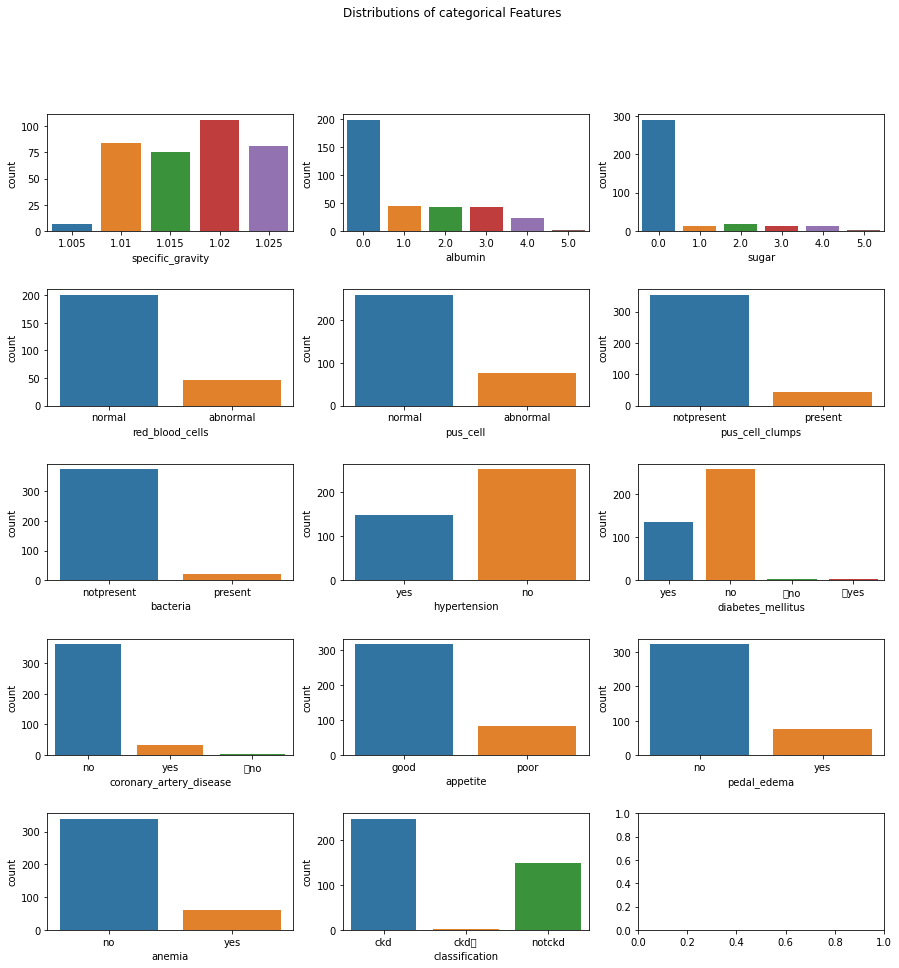

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of categorical Features')


for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

ValueError: could not convert string to float: '\t?'

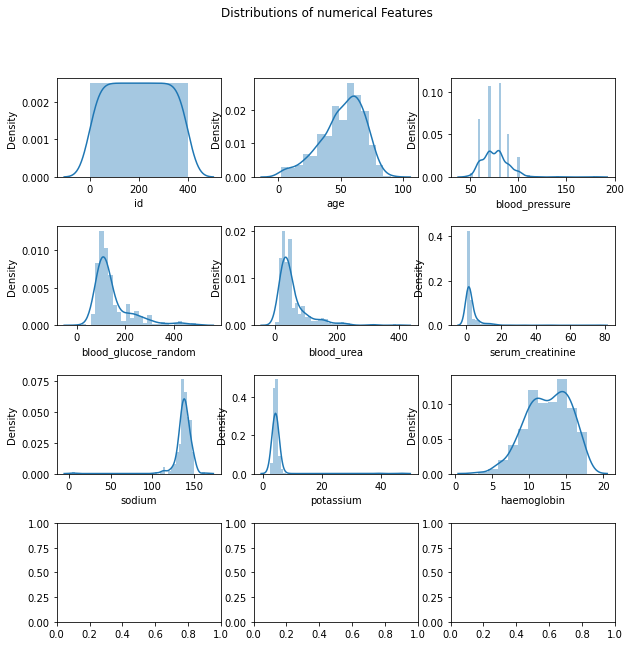

In [40]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of numerical Features')


for ax, feats in zip(axes.flatten(), numerical_features):
    sns.distplot(a=df[feats], ax=ax)

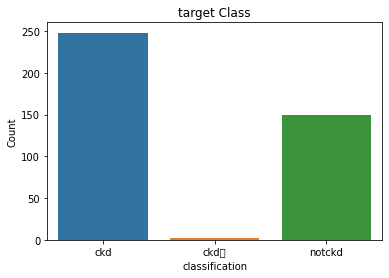

Percent of chronic kidney disease sample:  62.0 %
Percent of not a chronic kidney disease sample:  37.5 %


In [42]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

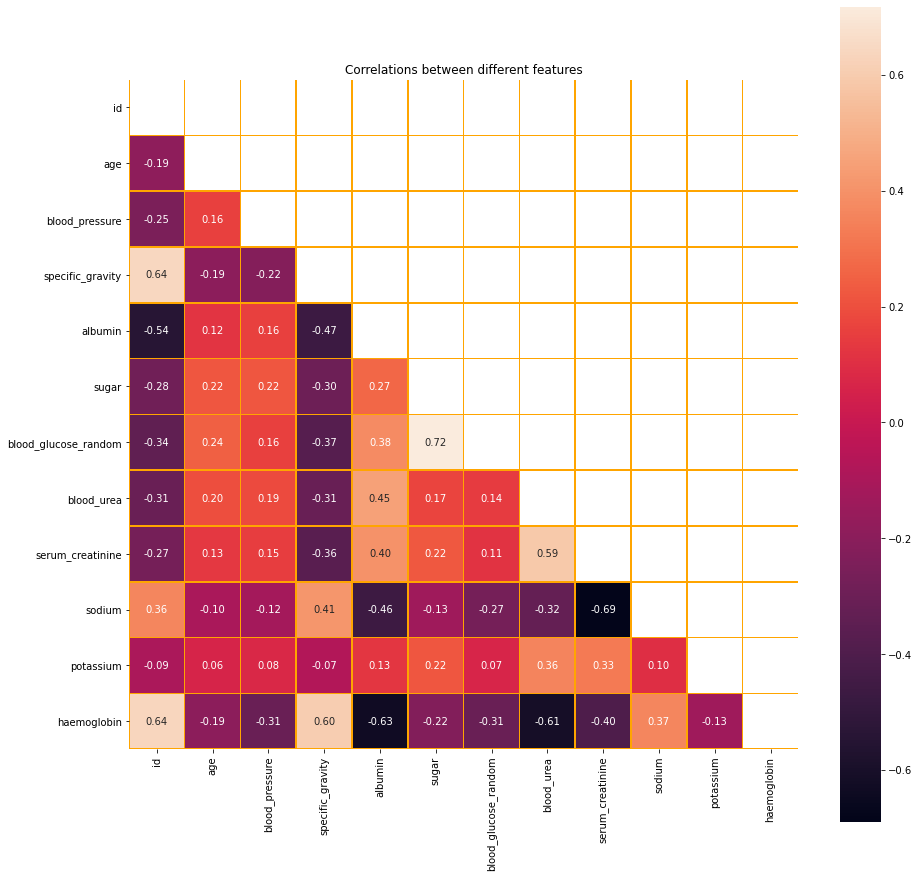

In [44]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.title('Correlations between different features')
plt.show()